In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
COVIDmatrix = pd.read_csv('HHS_COVID19USWeeklyFlowsSum.csv', index_col = 0)
COVIDmatrix.index = COVIDmatrix.index.astype(str).str.zfill(3)
ACSmatrix = pd.read_csv('HHS_Flows.csv', index_col = 0)
ACSmatrix.index = ACSmatrix.index.astype(str).str.zfill(3)
print(set(COVIDmatrix.columns) - set(ACSmatrix.columns))
COVIDmatrix = COVIDmatrix.drop(index='109', columns='109')
print(set(COVIDmatrix.columns) == set(ACSmatrix.columns))
print(set(COVIDmatrix.index) == set(ACSmatrix.index))

{'109'}
True
True


In [2]:
import numpy as np
import pandas as pd
from scipy import stats

# ────────────────────────────────────────────────────────────────
# 0   Ensure the two matrices line up exactly
# ────────────────────────────────────────────────────────────────
# (index and columns are HRR codes stored as *strings* here)
common = sorted(set(COVIDmatrix.index.astype(str)) & set(ACSmatrix.index.astype(str)))

COVID = COVIDmatrix.loc[common, common].astype(float)
ACS = ACSmatrix.loc[common, common].astype(float)

# ────────────────────────────────────────────────────────────────
# 1   Collapse i→j and j→i into a single undirected weight
# ────────────────────────────────────────────────────────────────
# pick the upper-triangle indices *above* the diagonal
tri_u = np.triu_indices(len(common), k=1)

covid_undir = COVID.values[tri_u] + COVID.values.T[tri_u]
acs_undir = ACS.values[tri_u] + ACS.values.T[tri_u]

# covid_undir and acs_undir are 1-D arrays, one element per unordered HRR pair

# ────────────────────────────────────────────────────────────────
# 2   Correlations
# ────────────────────────────────────────────────────────────────
pearson_r, pearson_p = stats.pearsonr(covid_undir, acs_undir)
spearman_r, spearman_p = stats.spearmanr(covid_undir, acs_undir)

print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")


Pearson r = 0.962 (p = 0)
Spearman ρ = 0.713 (p = 0)


In [3]:
CHECKmatrix = pd.read_csv('csb/dist_csvs/csv/CPRadmission_3NN_35.csv', index_col = 0)
CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)
CHECKmatrix

####DIFFERENT THAN WHAT WAS PREVIOUSLY PRINTED

,001,002,005,006,007,009,010,011,012,014,...,445,446,447,448,449,450,451,452,456,457
001,inf,-516.260031,-516.341108,-516.315761,-516.158473,-516.069265,-515.993855,-516.180812,-516.161783,-516.176561,...,-516.013501,-512.614191,-516.013544,-516.033383,-516.083935,-514.049020,-516.174171,-514.858684,-515.663598,-514.987843
002,-516.260031,inf,-516.286300,-516.353168,-516.074070,-516.018738,-515.774457,-516.055753,-516.065088,-516.058284,...,-515.683484,-512.442446,-515.681539,-515.848527,-515.910897,-513.705802,-515.848642,-514.727285,-515.407614,-514.916673
005,-516.341108,-516.286300,inf,-516.309330,-516.030390,-515.965591,-516.144440,-516.386875,-516.379108,-516.388320,...,-516.190751,-512.984025,-516.217813,-516.276444,-516.330381,-514.050748,-516.260632,-515.104971,-515.792075,-515.098101
006,-516.315761,-516.353168,-516.309330,inf,-516.033221,-516.023318,-515.809454,-516.135929,-516.137811,-516.136708,...,-515.728381,-512.306056,-515.702595,-515.907292,-515.887043,-513.838662,-515.907484,-514.623334,-515.517285,-514.930689
007,-516.158473,-516.074070,-516.030390,-516.033221,inf,-515.858873,-515.624861,-515.651163,-515.636020,-515.650296,...,-515.559004,-511.742105,-515.495117,-515.613559,-515.648798,-513.807053,-515.798813,-514.621568,-515.181047,-514.479497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-514.049020,-513.705802,-514.050748,-513.838662,-513.807053,-513.952400,-513.374273,-513.948258,-513.811683,-513.945968,...,-514.563466,-509.935627,-514.145464,-513.808303,-514.209170,inf,-514.628004,-512.984757,-513.996272,-512.655064
451,-516.174171,-515.848642,-516.260632,-515.907484,-515.798813,-515.761899,-516.031389,-516.245514,-516.194047,-516.241340,...,-516.339090,-512.768341,-516.346249,-516.189042,-516.346902,-514.628004,inf,-515.172836,-515.845493,-514.879136
452,-514.858684,-514.727285,-515.104971,-514.623334,-514.621568,-514.554385,-514.756995,-515.043945,-515.024955,-515.041088,...,-515.088989,-511.969782,-515.243086,-515.159815,-515.093601,-512.984757,-515.172836,inf,-514.638594,-513.752021
456,-515.663598,-515.407614,-515.792075,-515.517285,-515.181047,-515.318712,-515.586355,-515.830448,-515.796270,-515.827910,...,-515.750732,-512.345598,-515.798315,-515.734049,-515.792942,-513.996272,-515.845493,-514.638594,inf,-514.632256


In [4]:
import numpy as np
import pandas as pd
from scipy import stats

# ────────────────────────────────────────────────────────────────
# 0   Ensure the two matrices line up exactly
# ────────────────────────────────────────────────────────────────
# (index and columns are HRR codes stored as *strings* here)
common = sorted(set(COVIDmatrix.index.astype(str)) & set(CHECKmatrix.index.astype(str)))

COVID = COVIDmatrix.loc[common, common].astype(float)
diag_c = np.diag(COVID)
CHECK = CHECKmatrix.loc[common, common].astype(float)

# ────────────────────────────────────────────────────────────────
# 1   Collapse i→j and j→i into a single undirected weight
# ────────────────────────────────────────────────────────────────
# pick the upper-triangle indices *above* the diagonal
tri_u = np.triu_indices(len(common), k=1)
# den_c = np.sqrt(diag_c[tri_u[0]] * diag_c[tri_u[1]])
# den_c = diag_c[tri_u[0]] * diag_c[tri_u[1]]
den_c = 1

covid_undir = (COVID.values[tri_u] + COVID.values.T[tri_u]) / den_c
check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]

# covid_undir and check_undir are 1-D arrays, one element per unordered HRR pair

# ────────────────────────────────────────────────────────────────
# 2   Correlations
# ────────────────────────────────────────────────────────────────
pearson_r, pearson_p = stats.pearsonr(covid_undir, check_undir)
spearman_r, spearman_p = stats.spearmanr(covid_undir, check_undir)

print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")


Pearson r = -0.044 (p = 1.08e-21)
Spearman ρ = -0.404 (p = 0)


In [5]:
import numpy as np
import pandas as pd
from scipy import stats

# ────────────────────────────────────────────────────────────────
# 0   Ensure the two matrices line up exactly
# ────────────────────────────────────────────────────────────────
# (index and columns are HRR codes stored as *strings* here)
common = sorted(set(CHECKmatrix.index.astype(str)) & set(ACSmatrix.index.astype(str)))

CHECK = CHECKmatrix.loc[common, common].astype(float)
ACS = ACSmatrix.loc[common, common].astype(float)
diag_a = np.diag(ACS)

# ────────────────────────────────────────────────────────────────
# 1   Collapse i→j and j→i into a single undirected weight
# ────────────────────────────────────────────────────────────────
# pick the upper-triangle indices *above* the diagonal
tri_u = np.triu_indices(len(common), k=1)
# den_a = np.sqrt(diag_a[tri_u[0]] * diag_a[tri_u[1]])
# den_a = diag_a[tri_u[0]] * diag_a[tri_u[1]]
den_a = 1

check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]
acs_undir = (ACS.values[tri_u] + ACS.values.T[tri_u]) / den_a

# check_undir and acs_undir are 1-D arrays, one element per unordered HRR pair

# ────────────────────────────────────────────────────────────────
# 2   Correlations
# ────────────────────────────────────────────────────────────────
pearson_r, pearson_p = stats.pearsonr(check_undir, acs_undir)
spearman_r, spearman_p = stats.spearmanr(check_undir, acs_undir)

print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")


Pearson r = -0.033 (p = 6.48e-13)
Spearman ρ = -0.318 (p = 0)


In [6]:
row_corrs_p = [] # Pearson
row_corrs_s = [] # Spearman

for i, code in enumerate(common):
    covid_row = COVID.iloc[i, :].copy() + COVID.iloc[:, i].copy()
    acs_row = (ACS.iloc[i, :].copy() + ACS.iloc[:, i].copy()) / diag_a
    
    covid_row.at[code] = np.nan # mask the diagonal element
    acs_row.at[code] = np.nan

    mask = (~covid_row.isna()) & (~acs_row.isna())
    x, y = covid_row[mask], acs_row[mask]
    
    # Skip rows that are constant or empty after masking
    if x.nunique() < 2 or y.nunique() < 2:
        row_corrs_p.append(np.nan)
        row_corrs_s.append(np.nan)
        continue
    
    row_corrs_p.append(stats.pearsonr(x, y)[0])
    row_corrs_s.append(stats.spearmanr(x, y)[0])

row_corrs_p = np.array(row_corrs_p, dtype=float)
row_corrs_s = np.array(row_corrs_s, dtype=float)

# ────────────────────────────────────────────────────────────────
# 2   Aggregate the per-row coefficients
# ────────────────────────────────────────────────────────────────
mean_pearson = np.nanmean(row_corrs_p)
median_pearson = np.nanmedian(row_corrs_p)

mean_spearman = np.nanmean(row_corrs_s)
median_spearman = np.nanmedian(row_corrs_s)

print(f"Row-wise Pearson – mean: {mean_pearson:.3f}, median: {median_pearson:.3f}")
print(f"Row-wise Spearman – mean: {mean_spearman:.3f}, median: {median_spearman:.3f}")


Row-wise Pearson – mean: 0.764, median: 0.790
Row-wise Spearman – mean: 0.562, median: 0.562


In [7]:
row_corrs_p = [] # Pearson
row_corrs_s = [] # Spearman

for i, code in enumerate(common):
    check_row = CHECK.iloc[i, :].copy() + CHECK.iloc[:, i].copy()
    acs_row = (ACS.iloc[i, :].copy() + ACS.iloc[:, i].copy()) / diag_a
    
    check_row.at[code] = np.nan # mask the diagonal element
    acs_row.at[code] = np.nan

    mask = (~check_row.isna()) & (~acs_row.isna())
    x, y = check_row[mask], acs_row[mask]
    
    # Skip rows that are constant or empty after masking
    if x.nunique() < 2 or y.nunique() < 2:
        row_corrs_p.append(np.nan)
        row_corrs_s.append(np.nan)
        continue
    
    row_corrs_p.append(stats.pearsonr(x, y)[0])
    row_corrs_s.append(stats.spearmanr(x, y)[0])

row_corrs_p = np.array(row_corrs_p, dtype=float)
row_corrs_s = np.array(row_corrs_s, dtype=float)

# ────────────────────────────────────────────────────────────────
# 2   Aggregate the per-row coefficients
# ────────────────────────────────────────────────────────────────
mean_pearson = np.nanmean(row_corrs_p)
median_pearson = np.nanmedian(row_corrs_p)

mean_spearman = np.nanmean(row_corrs_s)
median_spearman = np.nanmedian(row_corrs_s)

print(f"Row-wise Pearson – mean: {mean_pearson:.3f}, median: {median_pearson:.3f}")
print(f"Row-wise Spearman – mean: {mean_spearman:.3f}, median: {median_spearman:.3f}")


Row-wise Pearson – mean: -0.033, median: -0.043
Row-wise Spearman – mean: -0.257, median: -0.267


In [8]:
row_corrs_p = [] # Pearson
row_corrs_s = [] # Spearman

for i, code in enumerate(common):
    # covid_row = (COVID.iloc[i, :].copy() + COVID.iloc[:, i].copy()) / diag_c
    covid_row = COVID.iloc[i, :].copy() + COVID.iloc[:, i].copy()
    check_row = CHECK.iloc[i, :].copy() + CHECK.iloc[:, i].copy()
    
    covid_row.at[code] = np.nan # mask the diagonal element
    check_row.at[code] = np.nan

    mask = (~covid_row.isna()) & (~check_row.isna())
    x, y = covid_row[mask], check_row[mask]
    
    # Skip rows that are constant or empty after masking
    if x.nunique() < 2 or y.nunique() < 2:
        row_corrs_p.append(np.nan)
        row_corrs_s.append(np.nan)
        continue
    
    row_corrs_p.append(stats.pearsonr(x, y)[0])
    row_corrs_s.append(stats.spearmanr(x, y)[0])

row_corrs_p = np.array(row_corrs_p, dtype=float)
row_corrs_s = np.array(row_corrs_s, dtype=float)

# ────────────────────────────────────────────────────────────────
# 2   Aggregate the per-row coefficients
# ────────────────────────────────────────────────────────────────
mean_pearson = np.nanmean(row_corrs_p)
median_pearson = np.nanmedian(row_corrs_p)

mean_spearman = np.nanmean(row_corrs_s)
median_spearman = np.nanmedian(row_corrs_s)

print(f"Row-wise Pearson – mean: {mean_pearson:.3f}, median: {median_pearson:.3f}")
print(f"Row-wise Spearman – mean: {mean_spearman:.3f}, median: {median_spearman:.3f}")


Row-wise Pearson – mean: -0.062, median: -0.067
Row-wise Spearman – mean: -0.406, median: -0.416


In [9]:
# ------------------------------------------------------------------
# 2   Load county → HRR cross-walk (with allocation factors)
# ------------------------------------------------------------------
xwalk = (
    pd.read_csv("csb/dist_csvs/geocorr2014.csv", dtype=str)
      .loc[:, ["county", "hrr", "afact"]]
      .assign(afact=lambda d: pd.to_numeric(d["afact"], errors="coerce"))
      .query("afact > 0")             # exclude zero-share fragments
)
xwalk = xwalk.dropna()
xwalk["afact"] = xwalk.groupby("county")["afact"].transform(lambda s: s / s.sum())
xwalk

,county,hrr,afact
1,01001,001,0.053
2,01001,007,0.947
3,01003,006,0.960
4,01003,134,0.040
5,01005,002,1.000
...,...,...,...
4666,56039,274,0.004
4667,56039,423,0.996
4668,56041,423,1.000
4669,56043,274,1.000


In [10]:
import pandas as pd
import numpy as np
from pathlib import Path

# ------------------------------------------------------------------
# 1.  Paths
# ------------------------------------------------------------------
WEEKLY_FILE = Path("corr_update/weekly_county2county_2019_01_07.csv")   # ← adjust if stored elsewhere
XWALK_FILE  = Path("csb/dist_csvs/geocorr2014.csv")                       # county ↔ HRR cross-walk

# ------------------------------------------------------------------
# 2.  Load county ↔ HRR cross-walk and normalise afact
# ------------------------------------------------------------------
xwalk = (
    pd.read_csv(XWALK_FILE, dtype={"county": "string", "hrr": "string"})
      .loc[:, ["county", "hrr", "afact"]]
      .assign(afact=lambda d: pd.to_numeric(d["afact"], errors="coerce"))
      .query("afact > 0")
)
xwalk = xwalk.drop(columns = ['afact'])

# ------------------------------------------------------------------
# 3.  Load the weekly file (one-time)
# ------------------------------------------------------------------
df = pd.read_csv(
        WEEKLY_FILE,
        usecols=["geoid_o", "geoid_d", "lng_o", "lat_o", "lng_d", "lat_d"],
        dtype={"geoid_o": "string", "geoid_d": "string"}
     ).drop_duplicates(subset=["geoid_o", "geoid_d"])      # coords are static

# ------------------------------------------------------------------
# 4.  Great-circle distance (km) – Haversine
# ------------------------------------------------------------------
R_EARTH = 6_371.0088  # km

φ1, φ2 = np.radians(df["lat_o"]), np.radians(df["lat_d"])
Δφ     = φ2 - φ1
Δλ     = np.radians(df["lng_d"] - df["lng_o"])
a      = np.sin(Δφ/2)**2 + np.cos(φ1) * np.cos(φ2) * np.sin(Δλ/2)**2
df["dist_km"] = 2 * R_EARTH * np.arcsin(np.sqrt(a))

# ------------------------------------------------------------------
# 5.  Attach HRR(s) – origin then destination
# ------------------------------------------------------------------
df = df.merge(
        xwalk.rename(columns={"county":"geoid_o", "hrr":"hrr_o"}), #, "afact":"afact_o"
        on="geoid_o", how="left"
     ).merge(
        xwalk.rename(columns={"county":"geoid_d", "hrr":"hrr_d"}), #, "afact":"afact_d"
        on="geoid_d", how="left"
     )

# ------------------------------------------------------------------
# 6.  Weight distance by afact_o × afact_d
# ------------------------------------------------------------------
# df["w"]       = df["afact_o"] * df["afact_d"]
# df["dist_w"]  = df["dist_km"] * df["w"]

# ------------------------------------------------------------------
# 7.  Aggregate to HRR ↔ HRR median distance
# ------------------------------------------------------------------
hrr2hrr_dist = (
    df.groupby(["hrr_o", "hrr_d"], as_index=False)
      .agg(median_dist_km=("dist_km", "median"))
)

# optional square matrix for fast lookup / plotting
dist_matrix = (
    hrr2hrr_dist.pivot(index="hrr_o", columns="hrr_d", values="median_dist_km").fillna(0)        # 0 on the diagonal
)

In [11]:
dist_matrix.to_csv('Haversine_update.csv')

In [12]:
# ────────────────────────────────────────────────────────────────
# 0   Ensure the two matrices line up exactly
# ────────────────────────────────────────────────────────────────
# (index and columns are HRR codes stored as *strings* here)

signal = 'Haversine'
common = sorted(set(COVIDmatrix.index.astype(str)) & set(dist_matrix.index.astype(str)))

COVID = COVIDmatrix.loc[common, common].astype(float)
diag_c = np.diag(COVID)
Haversine = dist_matrix.loc[common, common].astype(float)

# ────────────────────────────────────────────────────────────────
# 1   Collapse i→j and j→i into a single undirected weight
# ────────────────────────────────────────────────────────────────
# pick the upper-triangle indices *above* the diagonal
tri_u = np.triu_indices(len(common), k=1)
# den_c = np.sqrt(diag_c[tri_u[0]] * diag_c[tri_u[1]])
# den_c = diag_c[tri_u[0]] * diag_c[tri_u[1]]
den_c = 1

covid_undir = (COVID.values[tri_u] + COVID.values.T[tri_u]) / den_c
Haversine_undir = Haversine.values[tri_u] + Haversine.values.T[tri_u]

# covid_undir and Haversine_undir are 1-D arrays, one element per unordered HRR pair

# ────────────────────────────────────────────────────────────────
# 2   Correlations
# ────────────────────────────────────────────────────────────────
pearson_r, pearson_p = stats.pearsonr(covid_undir, Haversine_undir)
spearman_r, spearman_p = stats.spearmanr(covid_undir, Haversine_undir)
print(signal, 'vs COVID')
# print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")

# ────────────────────────────────────────────────────────────────
# 0   Ensure the two matrices line up exactly
# ────────────────────────────────────────────────────────────────
# (index and columns are HRR codes stored as *strings* here)
common = sorted(set(dist_matrix.index.astype(str)) & set(ACSmatrix.index.astype(str)))

Haversine = dist_matrix.loc[common, common].astype(float)
ACS = ACSmatrix.loc[common, common].astype(float)
diag_a = np.diag(ACS)

# ────────────────────────────────────────────────────────────────
# 1   Collapse i→j and j→i into a single undirected weight
# ────────────────────────────────────────────────────────────────
# pick the upper-triangle indices *above* the diagonal
tri_u = np.triu_indices(len(common), k=1)
# den_a = np.sqrt(diag_a[tri_u[0]] * diag_a[tri_u[1]])
# den_a = diag_a[tri_u[0]] * diag_a[tri_u[1]]
den_a = 1

Haversine_undir = Haversine.values[tri_u] + Haversine.values.T[tri_u]
acs_undir = (ACS.values[tri_u] + ACS.values.T[tri_u]) / den_a

# Haversine_undir and acs_undir are 1-D arrays, one element per unordered HRR pair

# ────────────────────────────────────────────────────────────────
# 2   Correlations
# ────────────────────────────────────────────────────────────────
pearson_r, pearson_p = stats.pearsonr(Haversine_undir, acs_undir)
spearman_r, spearman_p = stats.spearmanr(Haversine_undir, acs_undir)
print(signal, 'vs ACS')
# print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")

Haversine vs COVID
Spearman ρ = -0.006 (p = 0.167)
Haversine vs ACS
Spearman ρ = -0.086 (p = 6.04e-77)


In [13]:
for signal in ['CPRadmission', 'JHUcase', 'doctorvisits_adj', 'QUIDELpositive', 'FBpositive', 'FBwhh', 'FBwcli',
              'GoogleS03', 'GoogleS04', 'GoogleS05']:
    CHECKmatrix = pd.read_csv(f'csb/dist_csvs/csv/{signal}_3NN_35.csv', index_col = 0)
    CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)

    # ────────────────────────────────────────────────────────────────
    # 0   Ensure the two matrices line up exactly
    # ────────────────────────────────────────────────────────────────
    # (index and columns are HRR codes stored as *strings* here)
    common = sorted(set(COVIDmatrix.index.astype(str)) & set(CHECKmatrix.index.astype(str)))

    COVID = COVIDmatrix.loc[common, common].astype(float)
    diag_c = np.diag(COVID)
    CHECK = CHECKmatrix.loc[common, common].astype(float)

    # ────────────────────────────────────────────────────────────────
    # 1   Collapse i→j and j→i into a single undirected weight
    # ────────────────────────────────────────────────────────────────
    # pick the upper-triangle indices *above* the diagonal
    tri_u = np.triu_indices(len(common), k=1)
    # den_c = np.sqrt(diag_c[tri_u[0]] * diag_c[tri_u[1]])
    # den_c = diag_c[tri_u[0]] * diag_c[tri_u[1]]
    den_c = 1

    covid_undir = (COVID.values[tri_u] + COVID.values.T[tri_u]) / den_c
    check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]

    # covid_undir and check_undir are 1-D arrays, one element per unordered HRR pair

    # ────────────────────────────────────────────────────────────────
    # 2   Correlations
    # ────────────────────────────────────────────────────────────────
    pearson_r, pearson_p = stats.pearsonr(covid_undir, check_undir)
    spearman_r, spearman_p = stats.spearmanr(covid_undir, check_undir)
    print(signal, 'vs COVID')
    # print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
    print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")

    # ────────────────────────────────────────────────────────────────
    # 0   Ensure the two matrices line up exactly
    # ────────────────────────────────────────────────────────────────
    # (index and columns are HRR codes stored as *strings* here)
    common = sorted(set(CHECKmatrix.index.astype(str)) & set(ACSmatrix.index.astype(str)))

    CHECK = CHECKmatrix.loc[common, common].astype(float)
    ACS = ACSmatrix.loc[common, common].astype(float)
    diag_a = np.diag(ACS)

    # ────────────────────────────────────────────────────────────────
    # 1   Collapse i→j and j→i into a single undirected weight
    # ────────────────────────────────────────────────────────────────
    # pick the upper-triangle indices *above* the diagonal
    tri_u = np.triu_indices(len(common), k=1)
    # den_a = np.sqrt(diag_a[tri_u[0]] * diag_a[tri_u[1]])
    # den_a = diag_a[tri_u[0]] * diag_a[tri_u[1]]
    den_a = 1

    check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]
    acs_undir = (ACS.values[tri_u] + ACS.values.T[tri_u]) / den_a

    # check_undir and acs_undir are 1-D arrays, one element per unordered HRR pair

    # ────────────────────────────────────────────────────────────────
    # 2   Correlations
    # ────────────────────────────────────────────────────────────────
    pearson_r, pearson_p = stats.pearsonr(check_undir, acs_undir)
    spearman_r, spearman_p = stats.spearmanr(check_undir, acs_undir)
    print(signal, 'vs ACS')
    # print(f"Pearson r = {pearson_r:.3f} (p = {pearson_p:.3g})")
    print(f"Spearman ρ = {spearman_r:.3f} (p = {spearman_p:.3g})")


CPRadmission vs COVID
Spearman ρ = -0.404 (p = 0)
CPRadmission vs ACS
Spearman ρ = -0.318 (p = 0)
JHUcase vs COVID
Spearman ρ = -0.167 (p = 7.7e-286)
JHUcase vs ACS
Spearman ρ = -0.169 (p = 9.98e-294)
doctorvisits_adj vs COVID
Spearman ρ = -0.524 (p = 0)
doctorvisits_adj vs ACS
Spearman ρ = -0.428 (p = 0)
QUIDELpositive vs COVID
Spearman ρ = -0.271 (p = 0)
QUIDELpositive vs ACS
Spearman ρ = -0.214 (p = 2.69e-200)
FBpositive vs COVID
Spearman ρ = -0.085 (p = 2.31e-12)
FBpositive vs ACS
Spearman ρ = -0.082 (p = 1.08e-11)
FBwhh vs COVID
Spearman ρ = -0.357 (p = 0)
FBwhh vs ACS
Spearman ρ = -0.288 (p = 3.97e-207)
FBwcli vs COVID
Spearman ρ = -0.337 (p = 0)
FBwcli vs ACS
Spearman ρ = -0.278 (p = 5.19e-228)
GoogleS03 vs COVID
Spearman ρ = -0.279 (p = 0)
GoogleS03 vs ACS
Spearman ρ = -0.232 (p = 0)
GoogleS04 vs COVID
Spearman ρ = -0.500 (p = 0)
GoogleS04 vs ACS
Spearman ρ = -0.399 (p = 0)
GoogleS05 vs COVID
Spearman ρ = -0.323 (p = 1e-164)
GoogleS05 vs ACS
Spearman ρ = -0.314 (p = 5.16e-155)


305
Correlation matrices for CPRadmission
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.336     -0.143
ACS        0.671  1.000 -0.294     -0.126
CHECK     -0.336 -0.294  1.000     -0.082
Haversine -0.143 -0.126 -0.082      1.000



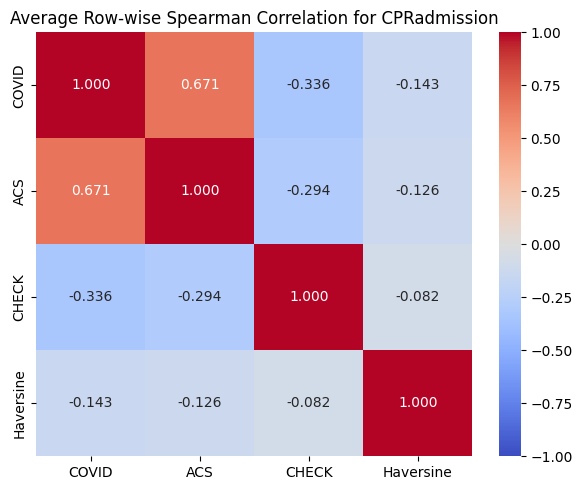

305
Correlation matrices for JHUcase
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.173     -0.143
ACS        0.671  1.000 -0.174     -0.126
CHECK     -0.173 -0.174  1.000      0.159
Haversine -0.143 -0.126  0.159      1.000



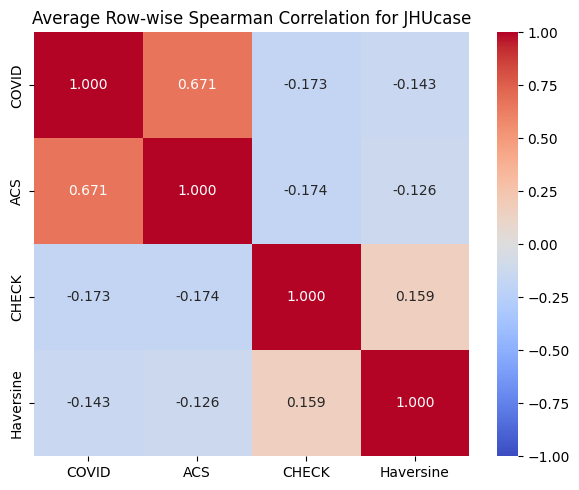

305
Correlation matrices for doctorvisits_adj
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.444     -0.143
ACS        0.671  1.000 -0.399     -0.126
CHECK     -0.444 -0.399  1.000     -0.103
Haversine -0.143 -0.126 -0.103      1.000



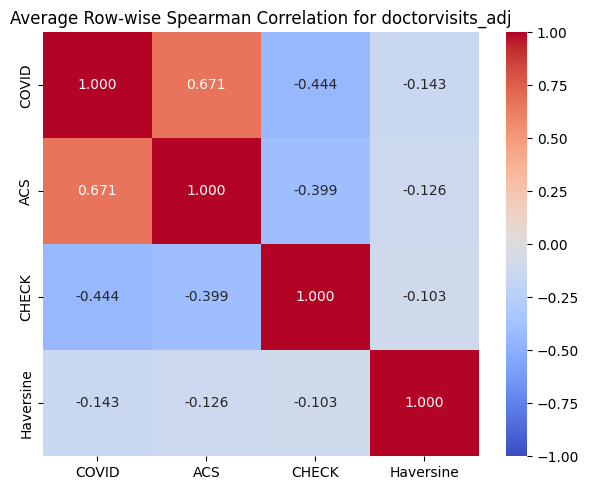

198
Correlation matrices for QUIDELpositive
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.688 -0.192     -0.288
ACS        0.688  1.000 -0.173     -0.221
CHECK     -0.192 -0.173  1.000      0.049
Haversine -0.288 -0.221  0.049      1.000



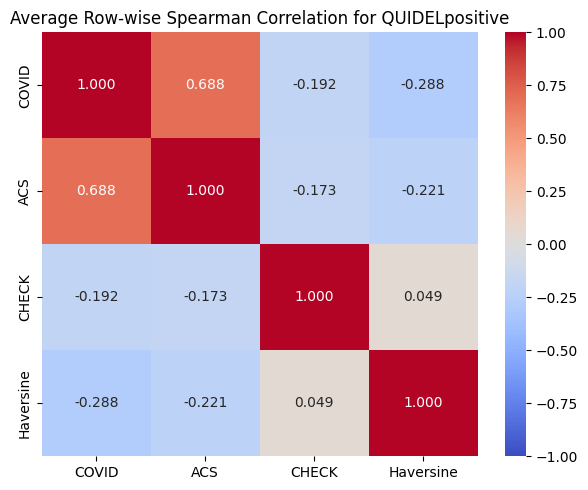

117
Correlation matrices for FBpositive
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.739 -0.056     -0.527
ACS        0.739  1.000 -0.046     -0.467
CHECK     -0.056 -0.046  1.000      0.175
Haversine -0.527 -0.467  0.175      1.000



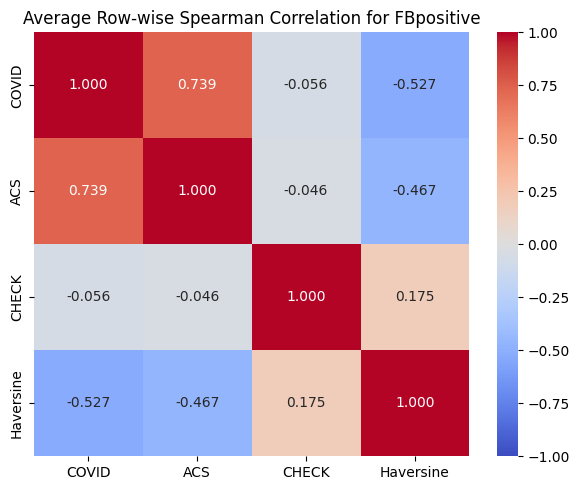

148
Correlation matrices for FBwhh
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.721 -0.209     -0.479
ACS        0.721  1.000 -0.186     -0.417
CHECK     -0.209 -0.186  1.000      0.013
Haversine -0.479 -0.417  0.013      1.000



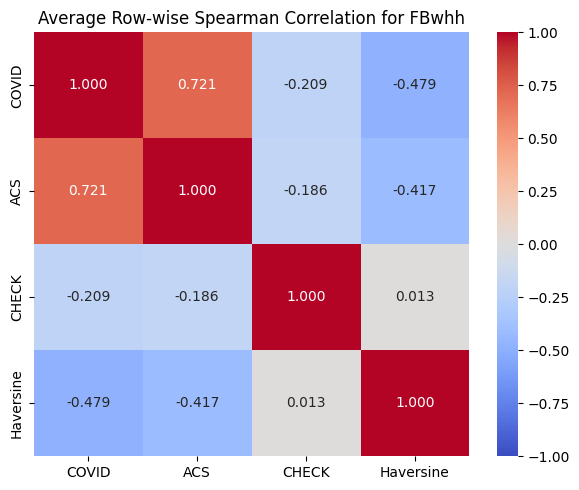

161
Correlation matrices for FBwcli
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.712 -0.219     -0.478
ACS        0.712  1.000 -0.199     -0.406
CHECK     -0.219 -0.199  1.000     -0.048
Haversine -0.478 -0.406 -0.048      1.000



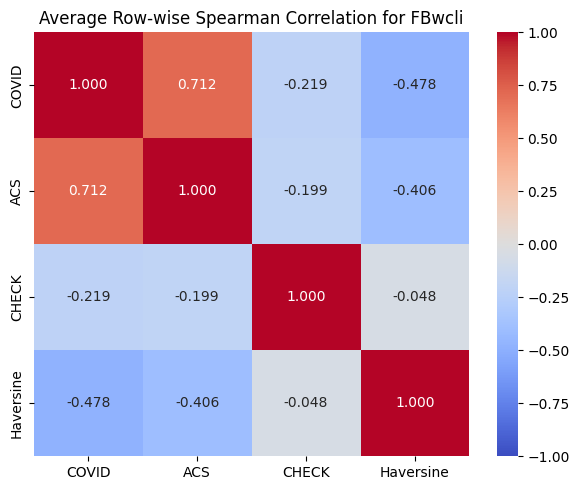

305
Correlation matrices for GoogleS03
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.671 -0.269     -0.143
ACS        0.671  1.000 -0.223     -0.126
CHECK     -0.269 -0.223  1.000      0.102
Haversine -0.143 -0.126  0.102      1.000



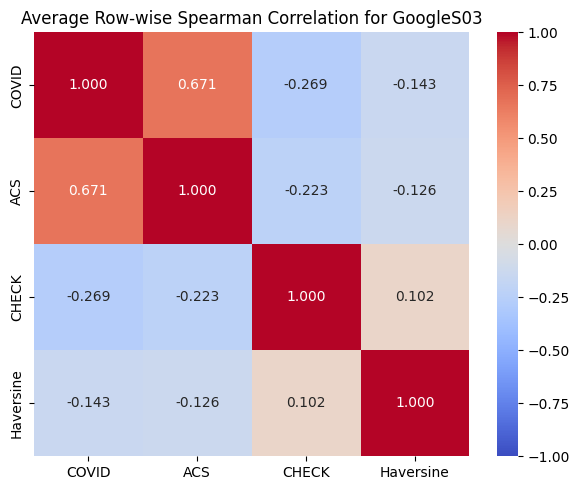

304
Correlation matrices for GoogleS04
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.672 -0.415     -0.147
ACS        0.672  1.000 -0.365     -0.130
CHECK     -0.415 -0.365  1.000     -0.132
Haversine -0.147 -0.130 -0.132      1.000



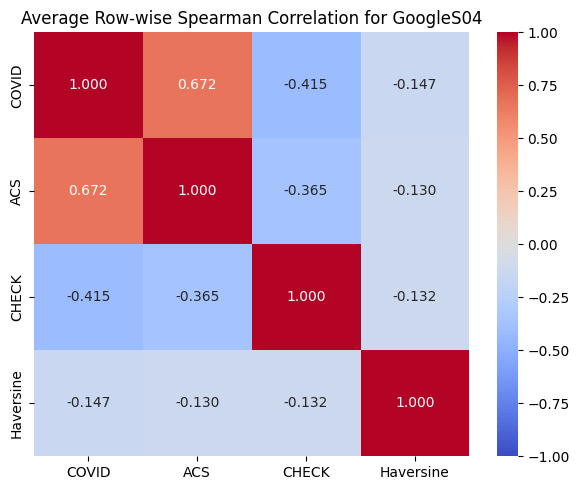

117
Correlation matrices for GoogleS05
--- Spearman ---
           COVID    ACS  CHECK  Haversine
COVID      1.000  0.789 -0.329     -0.517
ACS        0.789  1.000 -0.298     -0.499
CHECK     -0.329 -0.298  1.000      0.300
Haversine -0.517 -0.499  0.300      1.000



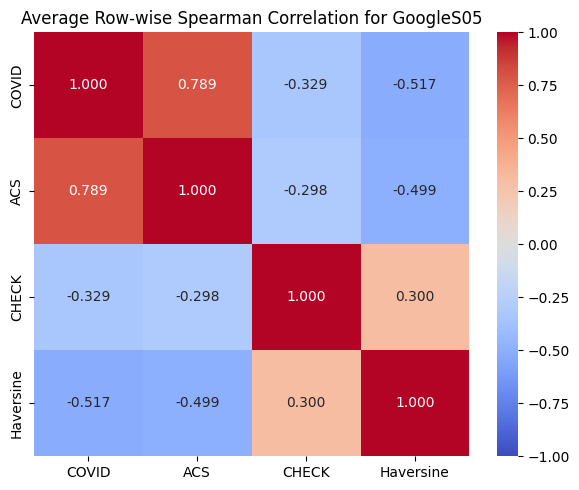

In [14]:
import pandas as pd
from scipy import stats

for signal in ['CPRadmission', 'JHUcase', 'doctorvisits_adj', 'QUIDELpositive', 'FBpositive', 'FBwhh', 'FBwcli',
              'GoogleS03', 'GoogleS04', 'GoogleS05']:
    CHECKmatrix = pd.read_csv(f'csb/dist_csvs/csv/{signal}_3NN_35.csv', index_col = 0)
    CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)

    # Align matrices
    common = sorted(set(COVIDmatrix.index.astype(str)) & set(ACSmatrix.index.astype(str)) & set(CHECKmatrix.index.astype(str)) & set(dist_matrix.index.astype(str)))
    print(len(common))

    COVID = COVIDmatrix.loc[common, common].astype(float)
    ACS = ACSmatrix.loc[common, common].astype(float)
    CHECK = CHECKmatrix.loc[common, common].astype(float)
    Haversine = dist_matrix.loc[common, common].astype(float)

    tri_u = np.triu_indices(len(common), k=1)

    diag_c = np.diag(COVID)
    diag_a = np.diag(ACS)
    den_c = np.sqrt(diag_c[tri_u[0]] * diag_c[tri_u[1]])
    # den_c = diag_c[tri_u[0]] * diag_c[tri_u[1]]
    # den_c = 1
    den_a = np.sqrt(diag_a[tri_u[0]] * diag_a[tri_u[1]])
    # den_a = diag_a[tri_u[0]] * diag_a[tri_u[1]]
    # den_a = 1

    covid_undir = (COVID.values[tri_u] + COVID.values.T[tri_u]) / den_c
    acs_undir = (ACS.values[tri_u] + ACS.values.T[tri_u]) / den_a
    check_undir = CHECK.values[tri_u] + CHECK.values.T[tri_u]
    haversine_undir = Haversine.values[tri_u] + Haversine.values.T[tri_u]

    # Combine into DataFrame
    df = pd.DataFrame({
        'COVID': covid_undir,
        'ACS': acs_undir,
        'CHECK': check_undir,
        'Haversine': haversine_undir
    })

    # Pearson correlation
    pearson_corr = df.corr(method='pearson')
    # Spearman correlation
    spearman_corr = df.corr(method='spearman')

    print(f'Correlation matrices for {signal}')
    # print('--- Pearson ---')
    # print(pearson_corr.round(3))
    print('--- Spearman ---')
    print(spearman_corr.round(3))
    print()
    corr_matrix = spearman_corr.astype(float)  # Add this to ensure all values are proper floats
    # Visualize
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f"Average Row-wise Spearman Correlation for {signal}" )
    plt.tight_layout()
    plt.show()


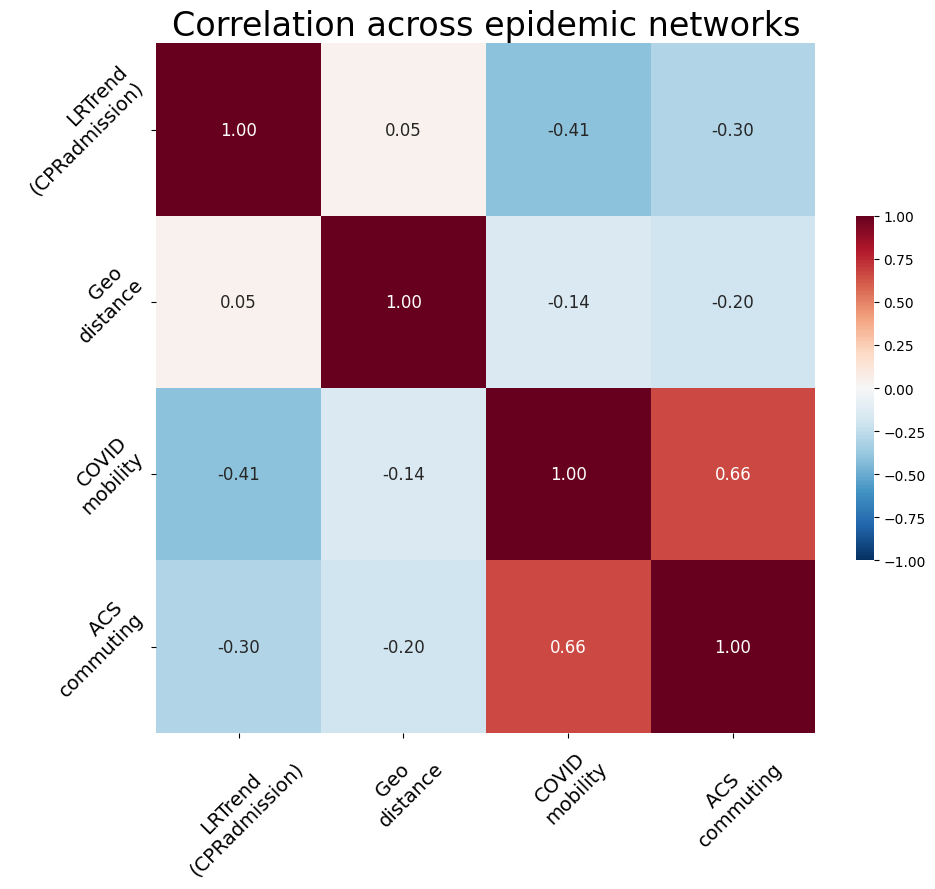

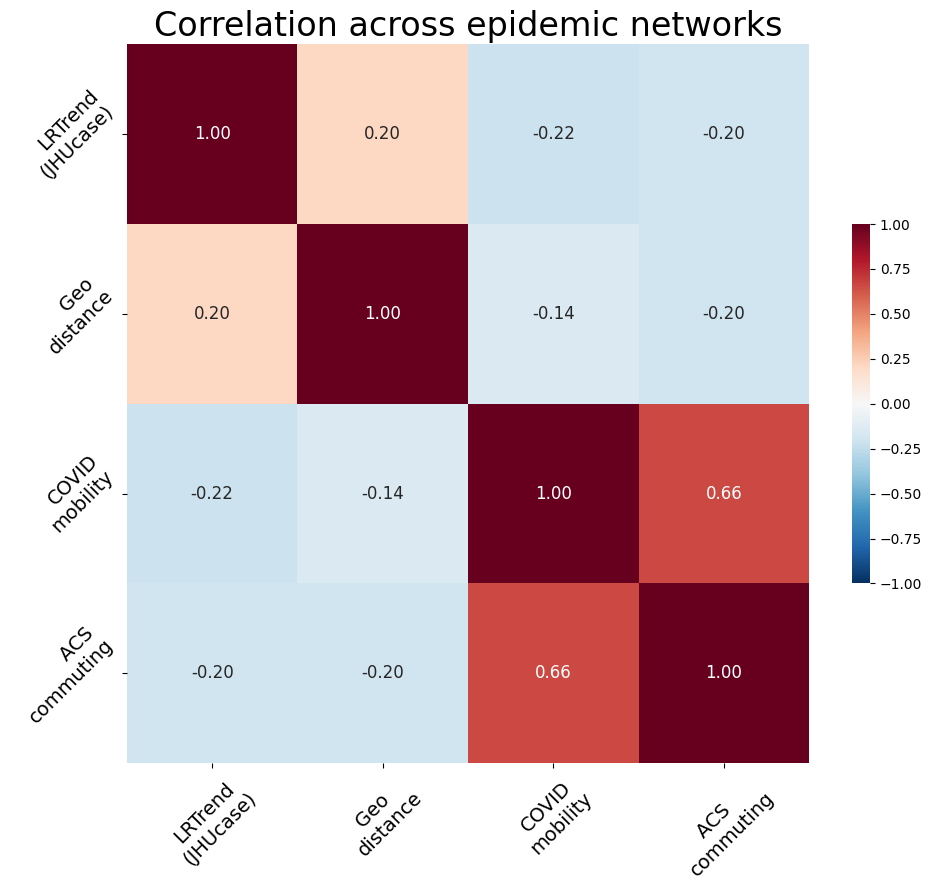

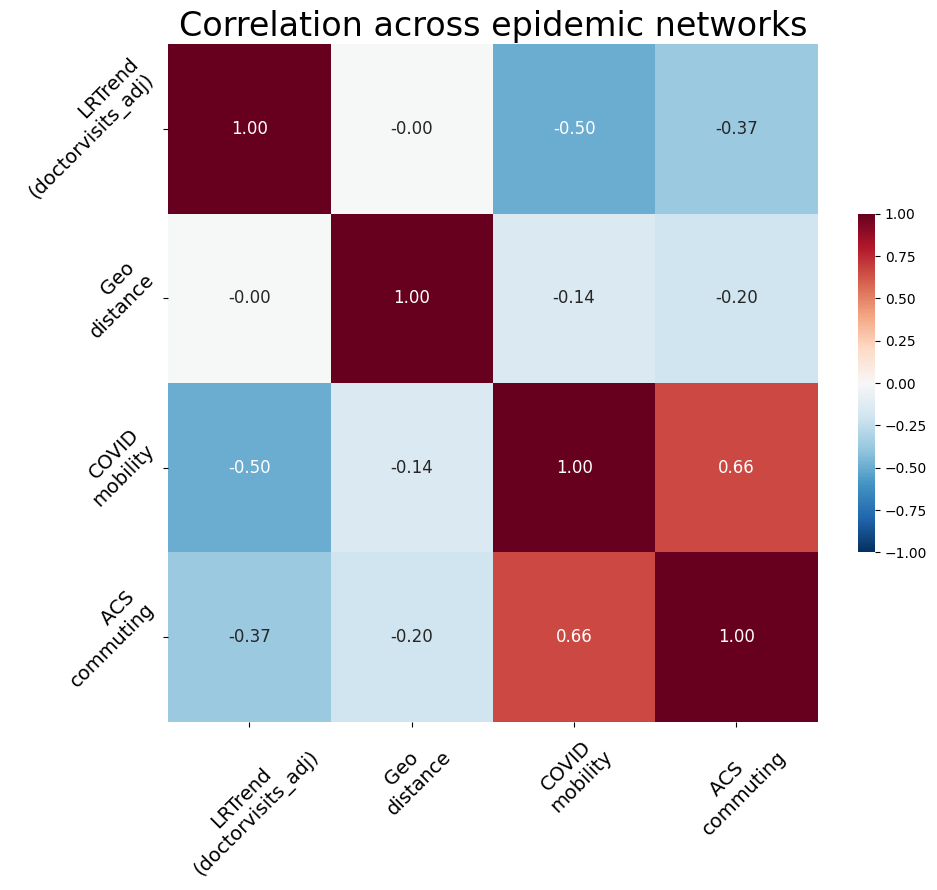

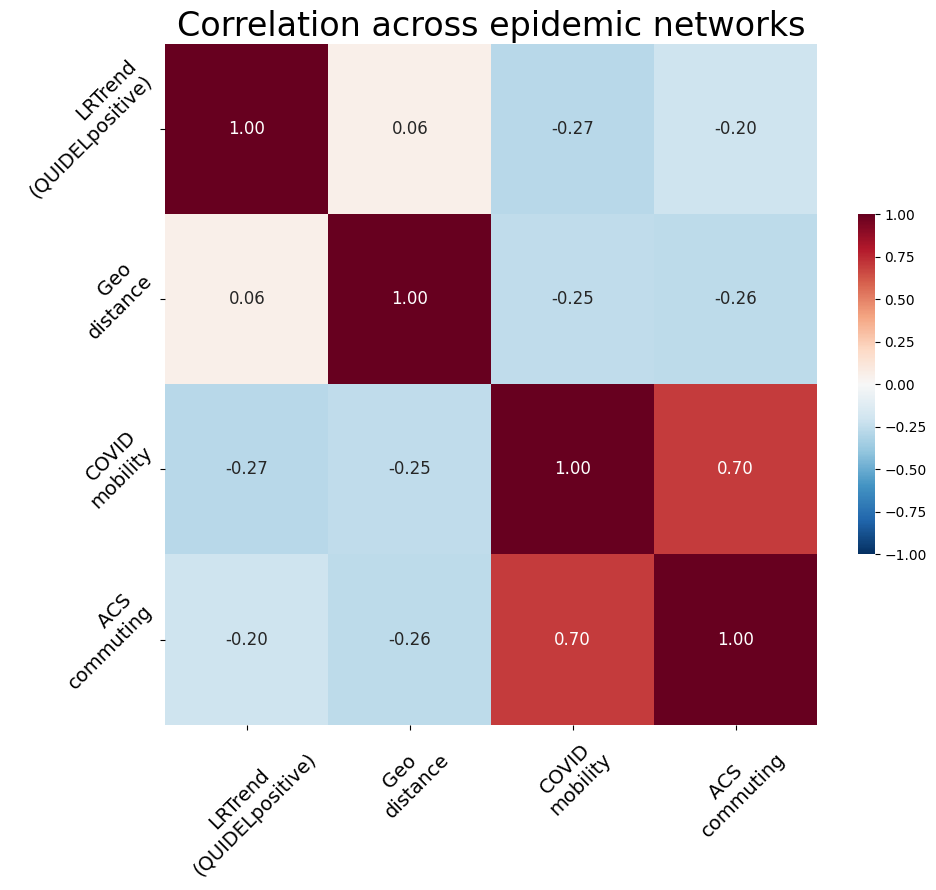

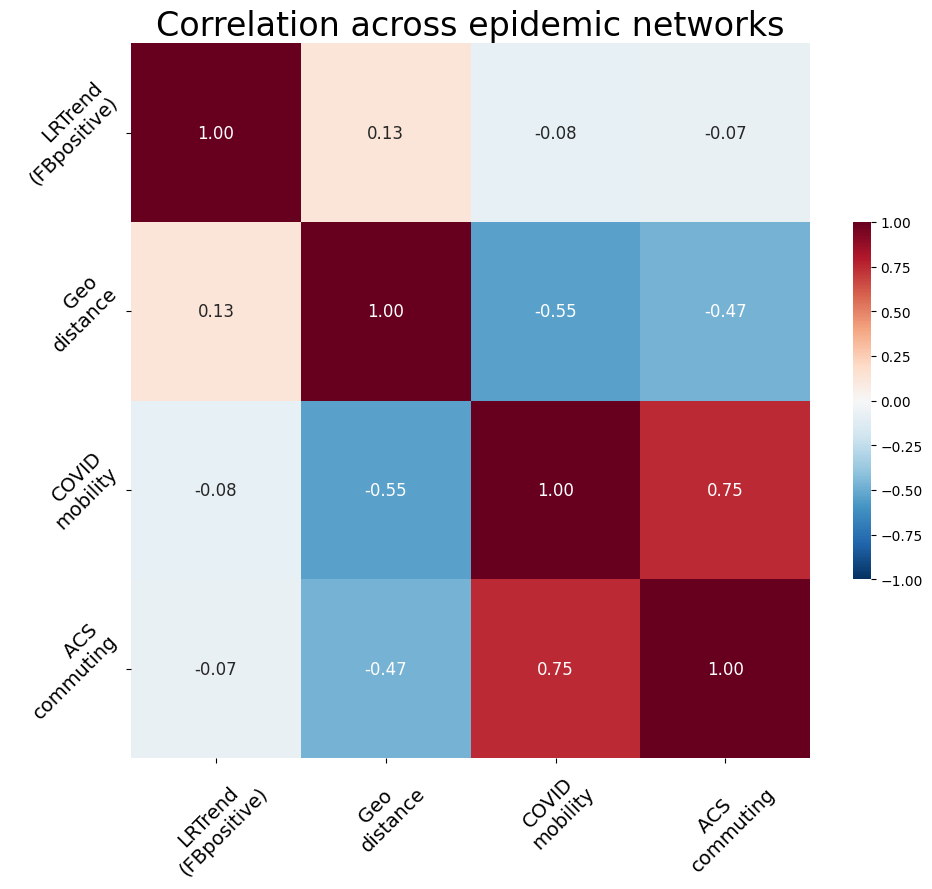

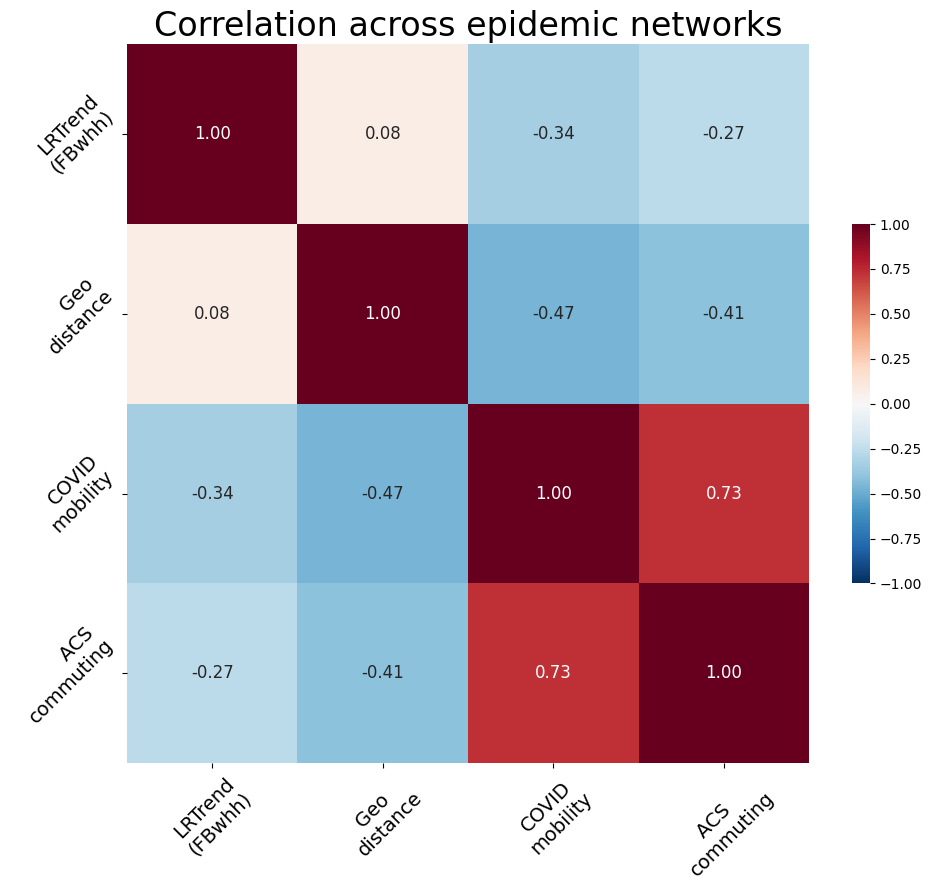

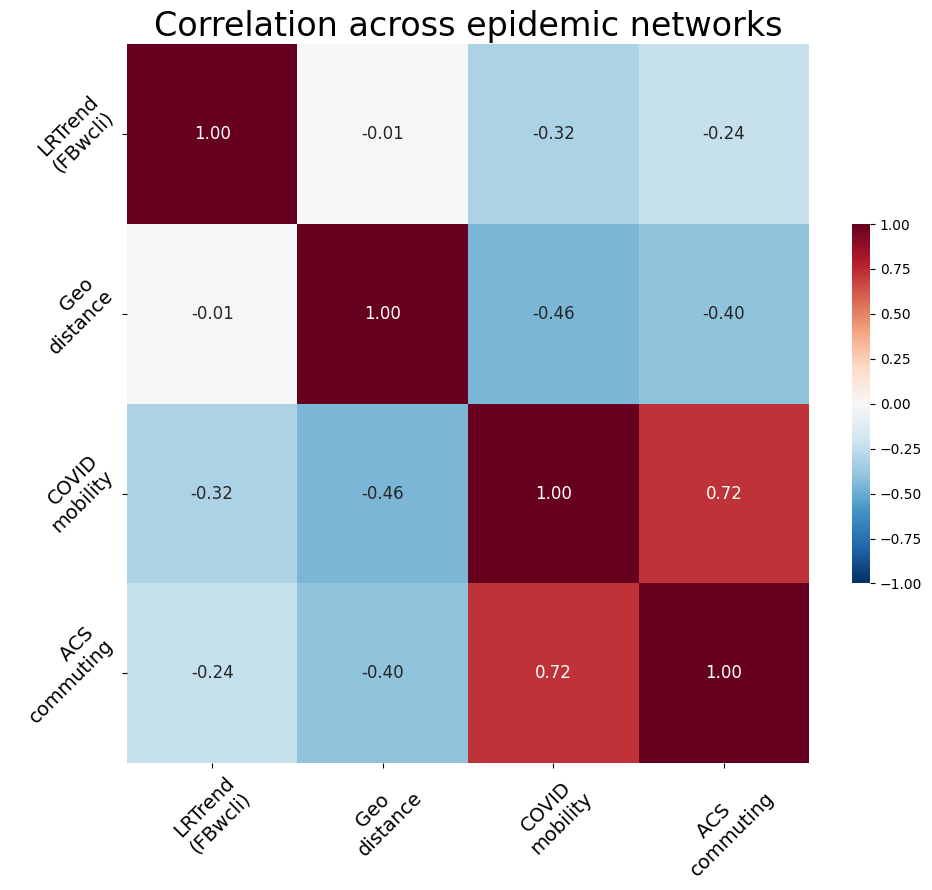

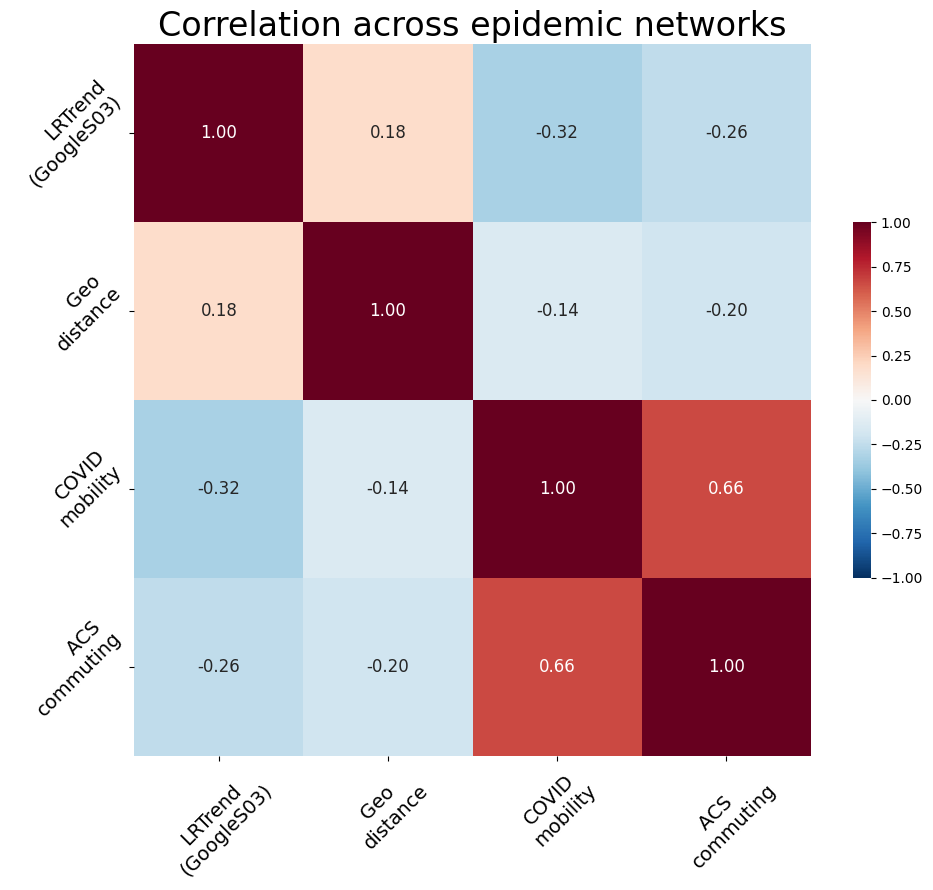

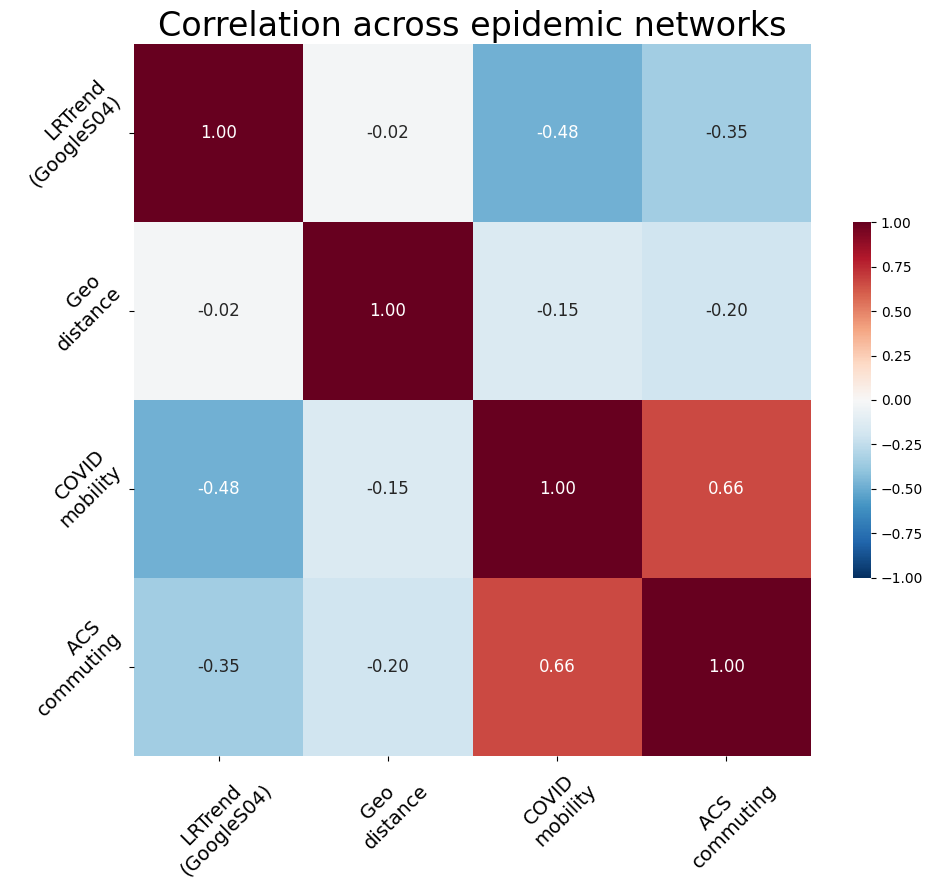

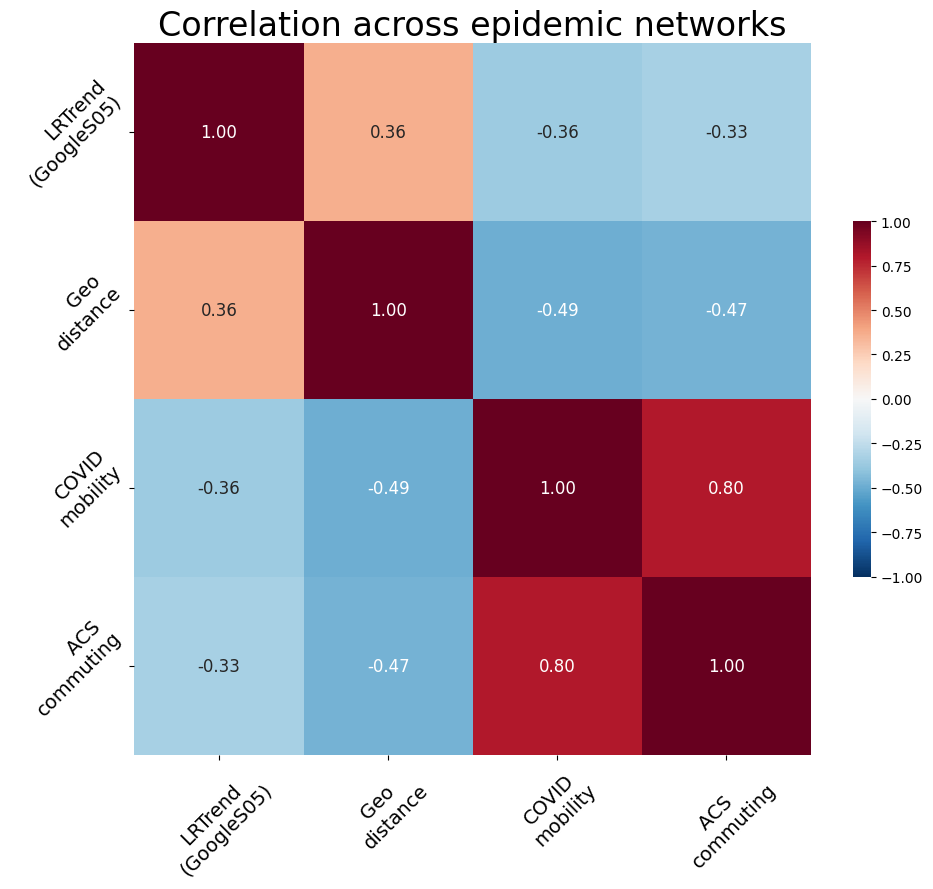

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
from collections import OrderedDict
from scipy import stats

# Loop through each LRTrend signal file
for signal in ['CPRadmission', 'JHUcase', 'doctorvisits_adj', 'QUIDELpositive',
               'FBpositive', 'FBwhh', 'FBwcli', 'GoogleS03', 'GoogleS04', 'GoogleS05']:
    # Load distance matrix for this signal
    CHECKmatrix = pd.read_csv(f'csb/dist_csvs/csv/{signal}_3NN_35.csv', index_col=0)
    CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)

    # Align indices across all four matrices
    common = sorted(
        set(COVIDmatrix.index.astype(str)) &
        set(ACSmatrix.index.astype(str)) &
        set(CHECKmatrix.index.astype(str)) &
        set(dist_matrix.index.astype(str))
    )
    COVID = COVIDmatrix.loc[common, common].astype(float)
    ACS = ACSmatrix.loc[common, common].astype(float)
    CHECK = CHECKmatrix.loc[common, common].astype(float)
    Haversine = dist_matrix.loc[common, common].astype(float)

    # Prepare matrices in the desired order with new labels
    matrices = OrderedDict([
        (f'LRTrend\n({signal})', CHECK),     # signal first
        ('Geo \ndistance', Haversine),       # then haversine
        ('COVID\nmobility', COVID),         # then COVID
        ('ACS \ncommuting', ACS),            # then ACS
    ])

    # Function to compute average row-wise Spearman correlation
    def rowwise_corr_spearman(mat1, mat2):
        corrs = []
        for i, code in enumerate(mat1.index):
            row1 = mat1.iloc[i, :].add(mat1.iloc[:, i], fill_value=0)
            row2 = mat2.iloc[i, :].add(mat2.iloc[:, i], fill_value=0)
            row1.at[code] = np.nan
            row2.at[code] = np.nan
            mask = (~row1.isna()) & (~row2.isna())
            x, y = row1[mask], row2[mask]
            if x.nunique() < 2 or y.nunique() < 2:
                corrs.append(np.nan)
            else:
                corrs.append(stats.spearmanr(x, y).correlation)
        return np.nanmean(corrs)

    # Build empty correlation DataFrame
    labels = list(matrices.keys())
    corr_matrix = pd.DataFrame(index=labels, columns=labels, dtype=float)

    # Compute pairwise correlations
    for i, j in product(labels, repeat=2):
        corr_matrix.loc[i, j] = rowwise_corr_spearman(matrices[i], matrices[j])
    corr_matrix = corr_matrix.astype(float)

    # Plot heatmap with a smaller colorbar
    plt.figure(figsize=(10, 9))
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt=".2f",
        cmap='RdBu_r',
        vmin=-1,
        vmax=1,
        cbar_kws={'shrink': 0.5},
        annot_kws={"size": 12}  # Make annotation labels larger
    )
    
    plt.xticks(rotation=45, fontsize=14)  # Adjust x-axis tick rotation and size
    plt.yticks(rotation=45, fontsize=14)   # Adjust y-axis tick rotation and size

    plt.title("Correlation across epidemic networks", fontsize=24)
    plt.tight_layout()
    plt.savefig(f'corr_heatmap_{signal}.png', dpi=300, bbox_inches='tight')
    plt.show()


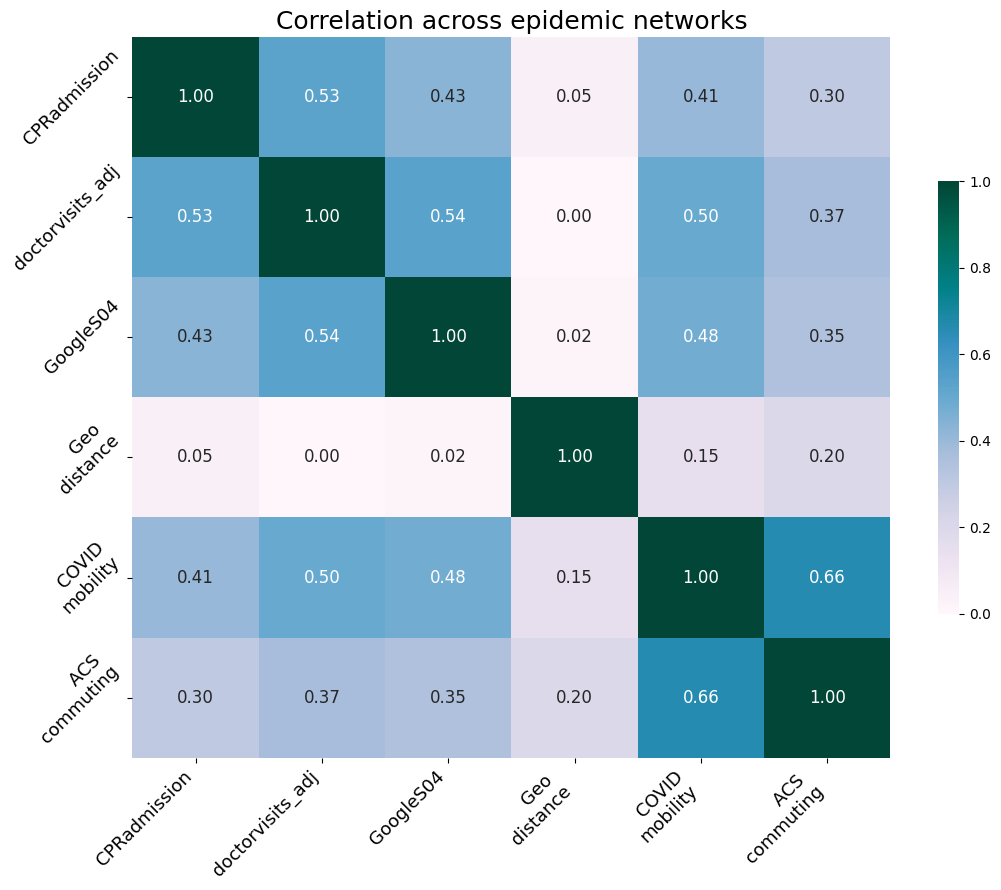

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
from collections import OrderedDict
from scipy import stats

# ---- Choose the LRTrend signals to include together ----
signals = ['CPRadmission', 'doctorvisits_adj', 'GoogleS04']
#signals = ['CPRadmission', 'JHUcase', 'doctorvisits_adj', 'QUIDELpositive', 'FBpositive', 'FBwhh', 'FBwcli',
#              'GoogleS03', 'GoogleS04', 'GoogleS05']
# ---- Load each LRTrend signal distance matrix ----
signal_mats = {}
for sig in signals:
    CHECKmatrix = pd.read_csv(f'csb/dist_csvs/csv/{sig}_3NN_35.csv', index_col=0)
    CHECKmatrix.index = CHECKmatrix.index.astype(str).str.zfill(3)
    CHECKmatrix.columns = CHECKmatrix.columns.astype(str).str.zfill(3)
    signal_mats[sig] = CHECKmatrix

# ---- Ensure base matrices have zero-padded string indices/columns ----
COVIDmatrix.index = COVIDmatrix.index.astype(str).str.zfill(3)
COVIDmatrix.columns = COVIDmatrix.columns.astype(str).str.zfill(3)

ACSmatrix.index = ACSmatrix.index.astype(str).str.zfill(3)
ACSmatrix.columns = ACSmatrix.columns.astype(str).str.zfill(3)

dist_matrix.index = dist_matrix.index.astype(str).str.zfill(3)
dist_matrix.columns = dist_matrix.columns.astype(str).str.zfill(3)

# ---- Align to common HRR set across all selected signals + bases ----
common = set(COVIDmatrix.index) & set(COVIDmatrix.columns) \
         & set(ACSmatrix.index) & set(ACSmatrix.columns) \
         & set(dist_matrix.index) & set(dist_matrix.columns)

for sig, mat in signal_mats.items():
    common &= set(mat.index) & set(mat.columns)

common = sorted(common)

# Slice and cast to float
COVID = COVIDmatrix.loc[common, common].astype(float)
ACS = ACSmatrix.loc[common, common].astype(float)
Haversine = dist_matrix.loc[common, common].astype(float)
signal_mats = {sig: mat.loc[common, common].astype(float) for sig, mat in signal_mats.items()}

# ---- Pack all matrices into one OrderedDict with clear labels ----
matrices = OrderedDict()

# Add each chosen LRTrend signal first (one entry per signal)
for sig in signals:
    matrices[f'{sig}'] = signal_mats[sig]

# Add the three baseline networks
matrices['Geo \ndistance'] = Haversine
matrices['COVID\nmobility'] = COVID
matrices['ACS \ncommuting'] = ACS

# ---- Row-wise Spearman correlation helper ----
def rowwise_corr_spearman(mat1, mat2):
    corrs = []
    for i, code in enumerate(mat1.index):
        # symmetrize per-row by summing row and column i
        row1 = mat1.iloc[i, :].add(mat1.iloc[:, i], fill_value=0)
        row2 = mat2.iloc[i, :].add(mat2.iloc[:, i], fill_value=0)
        # drop self
        row1.at[code] = np.nan
        row2.at[code] = np.nan
        mask = (~row1.isna()) & (~row2.isna())
        x, y = row1[mask], row2[mask]
        if x.nunique() < 2 or y.nunique() < 2:
            corrs.append(np.nan)
        else:
            corrs.append(stats.spearmanr(x, y).correlation)
    return np.abs(np.nanmean(corrs))

# ---- Compute pairwise correlations across all matrices ----
labels = list(matrices.keys())
corr_matrix = pd.DataFrame(index=labels, columns=labels, dtype=float)

for i, j in product(labels, repeat=2):
    corr_matrix.loc[i, j] = rowwise_corr_spearman(matrices[i], matrices[j])

corr_matrix = corr_matrix.astype(float)

# ---- Plot a single heatmap ----
plt.figure(figsize=(11, 9))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='PuBuGn',
    vmin=0,
    vmax=1,
    cbar_kws={'shrink': 0.6},
    annot_kws={"size": 12}
)
cbar = ax.collections[0].colorbar
cbar.set_label("Absolute Spearman correlation", fontsize=18)

plt.xticks(rotation=45, ha='right', fontsize=13)
plt.yticks(rotation=45, fontsize=13)
plt.title("Correlation across epidemic networks", fontsize=18)
plt.tight_layout()
plt.savefig('corr_heatmap_combined.png', dpi=300, bbox_inches='tight')
plt.show()


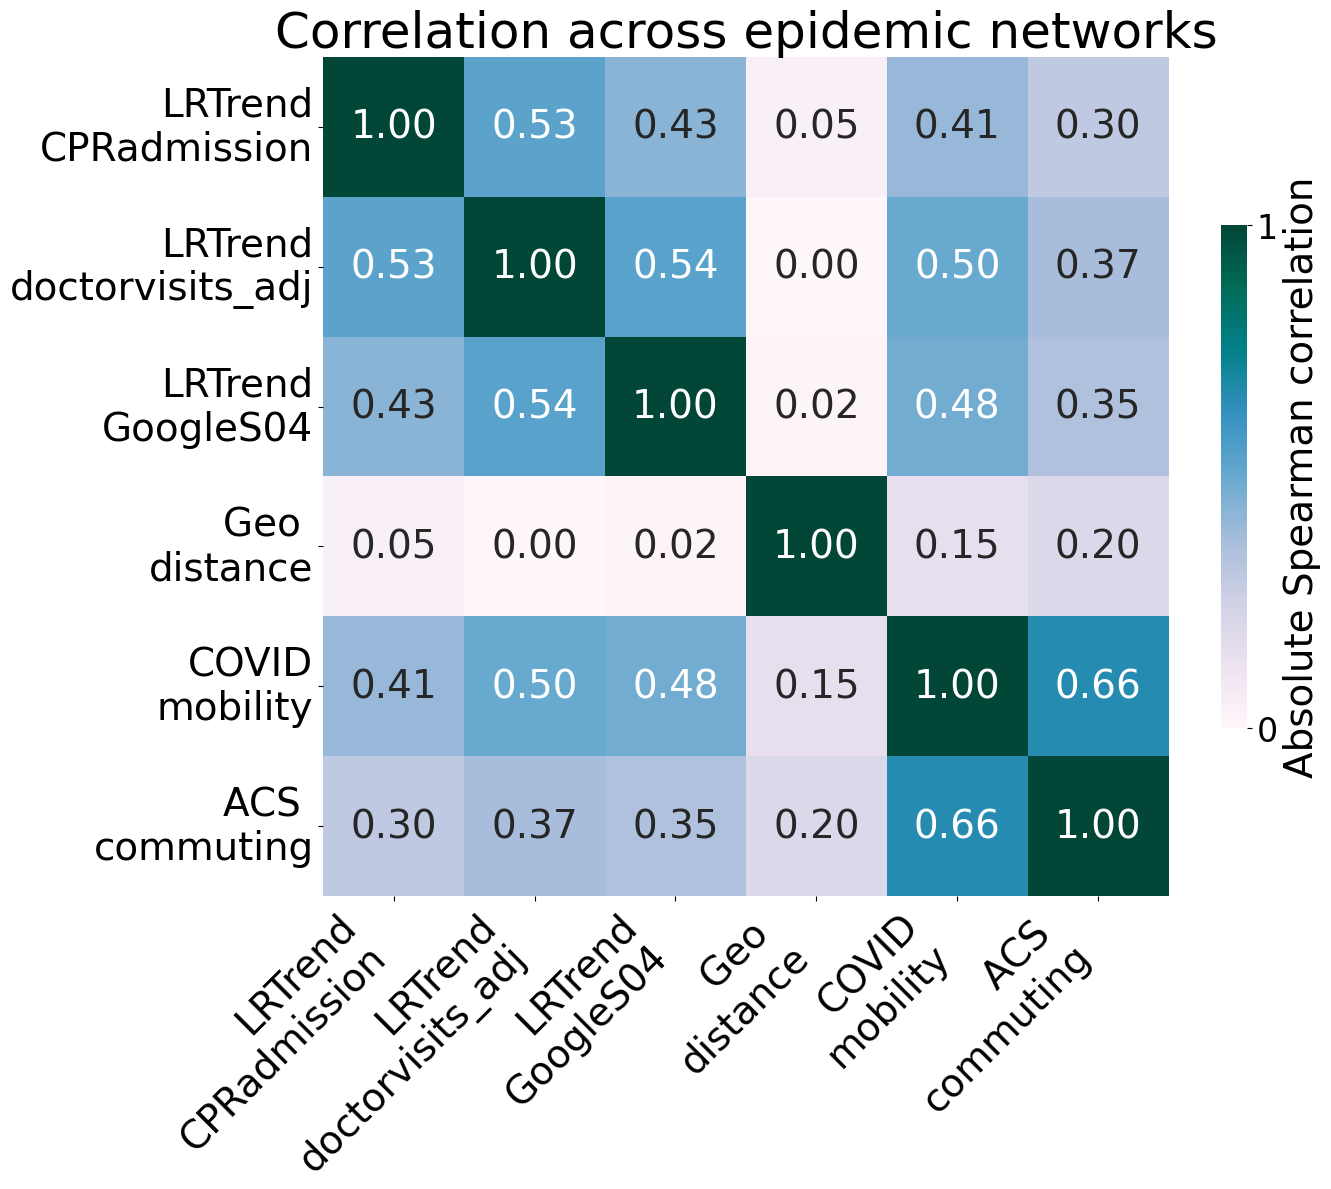

In [34]:
# ---- Plot a single heatmap ----
plt.figure(figsize=(14, 12))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='PuBuGn',
    vmin=0,
    vmax=1,
    cbar_kws={'shrink': 0.6, 'ticks': [-1, 0, 1]},  # set ticks
    annot_kws={"size": 28}
)

# ---- Customize axis tick labels ----
# Get current tick labels
x_labels = [tick.get_text() for tick in ax.get_xticklabels()]
y_labels = [tick.get_text() for tick in ax.get_yticklabels()]

# Prefix the first three with "LRTrend\n"
for i in range(min(3, len(x_labels))):
    x_labels[i] = f"LRTrend\n{x_labels[i]}"
for i in range(min(3, len(y_labels))):
    y_labels[i] = f"LRTrend\n{y_labels[i]}"

# Set new labels
ax.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=28)
ax.set_yticklabels(y_labels, rotation=0, fontsize=28)

# ---- Customize colorbar ----
cbar = ax.collections[0].colorbar
cbar.set_label("Absolute Spearman correlation", fontsize=28)
cbar.ax.tick_params(labelsize=24)  # make colorbar tick labels larger

# ---- Titles and layout ----
plt.title("Correlation across epidemic networks", fontsize=36)
plt.tight_layout()
plt.savefig('corr_heatmap_combined.png', dpi=300, bbox_inches='tight')
plt.show()
